In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import pickle

In [2]:
data=pd.read_csv('clean_profile_data_all.csv')
data.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking,SOP,LOR
0,316,164,152,106,2.90,9,3,northeastern_university,accept,15,4.5,4.5
1,314,163,151,114,3.53,7,3,northeastern_university,accept,15,4.0,4.5
2,307,160,147,88,3.00,36,0,northeastern_university,accept,15,3.0,3.5
3,330,169,161,113,2.40,48,3,northeastern_university,accept,15,3.5,2.5
4,316,163,153,99,2.71,30,0,northeastern_university,accept,15,2.0,3.0


In [4]:
data.describe()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,ranking,SOP,LOR
count,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.00000,9350.000000
mean,314.155722,162.828984,151.326738,97.540963,3.029640,16.857540,0.726417,47.039251,3.36984,3.478396
std,8.641709,4.840835,5.834517,22.163377,0.488294,16.127621,1.223988,33.960770,0.99106,0.925572
min,260.000000,130.000000,130.000000,0.000000,1.060000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,308.000000,160.000000,148.000000,95.000000,2.720000,2.000000,0.000000,16.000000,2.50000,3.000000
50%,314.000000,163.000000,151.000000,103.000000,3.100000,15.000000,0.000000,35.000000,3.50000,3.500000
75%,320.000000,167.000000,155.000000,109.000000,3.400000,27.000000,1.000000,64.000000,4.00000,4.000000
max,340.000000,170.000000,170.000000,120.000000,4.000000,153.000000,3.000000,130.000000,5.00000,5.000000


In [5]:
data.university_name.value_counts()

northeastern_university                        1653
state_university_of_new_york_at_stony_brook     602
north_carolina_state_university_raleigh         588
syracuse_university                             518
university_of_texas_dallas                      474
illinois_institute_of_technology                435
university_of_california_irvine                 400
texas_a_m_university_college_station            387
university_of_north_carolina_at_charlotte       380
indiana_university_bloomington                  343
rochester_institute_of_technology               341
university_of_colorado_boulder                  341
new_york_university                             318
university_of_texas_arlington                   312
rutgers_university_new_brunswick                304
university_of_maryland_college_park             264
george_mason_university                         264
university_of_cincinnati                        242
university_of_texas_austin                      233
carnegie_mel

In [7]:
target_universities=data.university_name.unique().tolist()

In [8]:
from sklearn.utils import resample

In [10]:
resampled_dfs=[]
resampled_df = pd.DataFrame()
for each in target_universities:
    if data[(data.university_name==each )].shape[0]> 600:
        
        resampled_dfs.append(resample(data[(data.university_name==each )&(data.status=='accept')],replace=True,n_samples=300,random_state=123))
        resampled_dfs.append(resample(data[(data.university_name==each) &(data.status=='reject')],replace=True,n_samples=300,random_state=123))
        
    elif data[(data.university_name==each )].shape[0] < 200:
        resampled_dfs.append(resample(data[(data.university_name==each )&(data.status=='accept')],replace=True,n_samples=125,random_state=123))
        resampled_dfs.append(resample(data[(data.university_name==each) &(data.status=='reject')],replace=True,n_samples=125,random_state=123))
    else:
        resampled_dfs.append(data[(data.university_name==each )&(data.status=='accept')])
        resampled_dfs.append(data[(data.university_name==each )&(data.status=='reject')])
        

resampled_df = pd.concat( [ f for f in resampled_dfs ] )

In [11]:
resampled_df.groupby(by='university_name')['status'].value_counts()

university_name                              status
carnegie_mellon_university                   accept    125
                                             reject    125
clemson_university                           accept    125
                                             reject    125
george_mason_university                      accept    168
                                             reject     96
georgia_institiute_of_technology             accept    125
                                             reject    125
illinois_institute_of_technology             accept    268
                                             reject    167
indiana_university_bloomington               accept    271
                                             reject     72
kansas_state_university                      accept    125
                                             reject    125
michigan_technological_university            accept    125
                                             reject    125
new_

In [12]:
dataset =resampled_df.copy()

In [13]:
dataset

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,university_name,status,ranking,SOP,LOR
510,314,165,149,100,2.90,0,2,northeastern_university,accept,15,3.5,4.0
365,315,162,153,100,3.30,60,0,northeastern_university,accept,15,4.5,3.0
382,309,163,146,104,2.64,32,0,northeastern_university,accept,15,4.5,4.0
322,310,162,148,99,2.85,24,0,northeastern_university,accept,15,2.5,4.0
98,320,170,150,104,3.86,2,1,northeastern_university,accept,15,5.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...
9325,315,165,150,104,3.12,3,2,worcester_polytechnic_institute,reject,79,5.0,4.5
9338,310,164,146,97,3.11,24,0,worcester_polytechnic_institute,reject,79,1.5,1.5
9320,299,159,140,86,2.99,15,0,worcester_polytechnic_institute,reject,79,4.0,5.0
9326,314,162,152,105,3.06,2,3,worcester_polytechnic_institute,reject,79,5.0,3.5


In [14]:
training, testing = train_test_split(dataset, test_size=0.25, random_state=5, stratify=dataset[['university_name', 'status']])

In [15]:
testing.groupby(by=['university_name'])['status'].value_counts()

university_name                              status
carnegie_mellon_university                   accept    31
                                             reject    31
clemson_university                           accept    31
                                             reject    31
george_mason_university                      accept    42
                                             reject    24
georgia_institiute_of_technology             accept    31
                                             reject    31
illinois_institute_of_technology             accept    67
                                             reject    42
indiana_university_bloomington               accept    68
                                             reject    18
kansas_state_university                      accept    31
                                             reject    31
michigan_technological_university            accept    31
                                             reject    31
new_york_university 

In [16]:
training.shape,testing.shape

((7383, 12), (2461, 12))

In [18]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

In [19]:
def get_result(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler() 
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test) 
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    prob_test=pd.DataFrame(model.predict_proba(X_test))
    prob_train=pd.DataFrame(model.predict_proba(X_train))
    test_f1_score = f1_score(Y_test, y_pred,pos_label='accept')
    train_f1_score = f1_score(Y_train, y_train_pred,pos_label='accept')
    train_accuracy=accuracy_score(Y_train, y_train_pred)
    test_accuracy=accuracy_score(Y_test, y_pred)
    test_cm = confusion_matrix(Y_test, y_pred,labels=['accept','reject'])
    train_cm = confusion_matrix(Y_train, y_train_pred,labels=['accept','reject'])
    model_name.append(model)
    model_train_acc.append(train_accuracy)
    model_test_accuracy.append(test_accuracy)
    model_test_f1.append(test_f1_score)
    model_train_f1.append(train_f1_score)
    return [train_cm,test_cm,train_accuracy,test_accuracy,train_f1_score, test_f1_score, prob_train,prob_test, y_pred,y_train_pred, model,sc]

In [20]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

def generate_cm_roc(model_results):
    test_fpr,test_tpr,test_thresholds = metrics.roc_curve(testing['status'], model_results[7][0],pos_label='accept')
    test_roc_auc = auc(test_fpr, test_tpr)
    train_fpr,train_tpr,train_thresholds = metrics.roc_curve(training['status'], model_results[6][0],pos_label='accept')
    train_roc_auc = auc(train_fpr, train_tpr)
    plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
                 label='Train ROC (auc= %0.2f)' % (train_roc_auc))
    plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
                 label='Test ROC (auc= %0.2f)' % (test_roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    f,ax = plt.subplots(figsize=(2, 2))
    sns.heatmap(model_results[0], annot=True, linewidths=1, fmt= '.1f',ax=ax)
    plt.title('Train Confusion Matrix')
    plt.show()
    f,ax = plt.subplots(figsize=(2, 2))
    sns.heatmap(model_results[1], annot=True, linewidths=1, fmt= '.1f',ax=ax)
    plt.title('Test confusion matrix')
    plt.show()

In [21]:
numerical_data = training.select_dtypes(include = ['int64','float','uint8'])
categorical_data = training.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
numerical_features

array(['gre_score', 'gre_score_quant', 'gre_score_verbal',
       'test_score_toefl', 'undergraduation_score', 'work_ex',
       'papers_published', 'ranking', 'SOP', 'LOR '], dtype=object)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score
svc_model=SVC(gamma='auto',probability=True)

svc_model_results=get_result(svc_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])


In [25]:
print('test_accuracy:',svc_model_results[3])
print('train_accuracy:',svc_model_results[2])
print('test_f1_score:',svc_model_results[5])
print('train_f1_score:',svc_model_results[4])

test_accuracy: 0.6525802519301097
train_accuracy: 0.6830556684274685
test_f1_score: 0.6072576940744144
train_f1_score: 0.6427480916030535


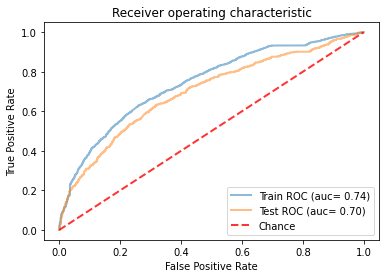

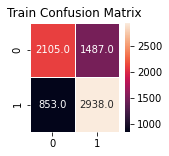

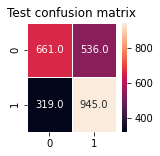

In [26]:
generate_cm_roc(svc_model_results)

In [27]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()

decision_tree_model_results=get_result(decision_tree_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

In [28]:
print('test_accuracy:',decision_tree_model_results[3])
print('train_accuracy:',decision_tree_model_results[2])
print('test_f1_score:',decision_tree_model_results[5])
print('train_f1_score:',decision_tree_model_results[4])

test_accuracy: 0.7452255180820805
train_accuracy: 1.0
test_f1_score: 0.736886277801091
train_f1_score: 1.0


In [29]:
decision_tree_model_results[10].get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

<BarContainer object of 10 artists>

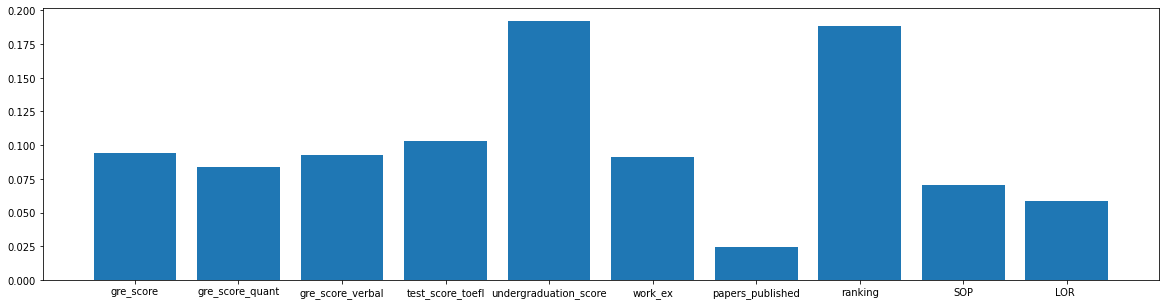

In [30]:
plt.figure(figsize=(20,5))
plt.bar(numerical_features.tolist(),decision_tree_model_results[10].feature_importances_)

In [31]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=10)

random_forest_model_results=get_result(random_forest_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',random_forest_model_results[3])
print('train_accuracy:',random_forest_model_results[2])
print('test_f1_score:',random_forest_model_results[5])
print('train_f1_score:',random_forest_model_results[4])

test_accuracy: 0.7696058512799675
train_accuracy: 0.9891642963564946
test_f1_score: 0.7701661937576004
train_f1_score: 0.9889258028792913


In [32]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=random_forest_model_results[10]

param_grid = {"n_estimators": [10,15,20,25,30],
             "max_depth": [10,15,20,25],
             "bootstrap": [True, False]}
random_forest_model_clf = GridSearchCV(random_forest_model,param_grid,cv=5,return_train_score=True)


random_forest_model_results=get_result(random_forest_model_clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',random_forest_model_results[3])
print('train_accuracy:',random_forest_model_results[2])
print('test_f1_score:',random_forest_model_results[5])
print('train_f1_score:',random_forest_model_results[4])

test_accuracy: 0.794392523364486
train_accuracy: 0.9989164296356494
test_f1_score: 0.7859560067681894
train_f1_score: 0.9988861041492622


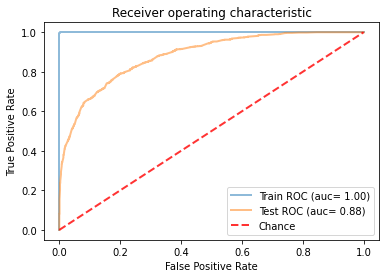

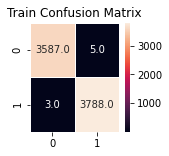

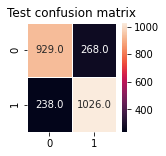

In [33]:
generate_cm_roc(random_forest_model_results)

In [34]:
random_forest_model_results[10].best_score_

0.7770582536563347

In [35]:
import pickle
# Dump the trained decision tree classifier with Pickle
rf_classifier_pkl_filename = 'student_university_random_forest_predict.pickel'
standard_scaler_filename = 'standard_scaler_rf_model.pickel'

random_forest_classifier_model_pkl = open(rf_classifier_pkl_filename, 'wb')
pickle.dump(random_forest_model_results[10], random_forest_classifier_model_pkl)

random_forest_classifier_model_pkl.close()

sc_rf_classifier_scaler_pkl = open(standard_scaler_filename, 'wb')
pickle.dump(random_forest_model_results[11], sc_rf_classifier_scaler_pkl)

sc_rf_classifier_scaler_pkl.close()

random_forest_classifier_model_pkl = open(rf_classifier_pkl_filename, 'rb')
random_forest_classifier_model= pickle.load(random_forest_classifier_model_pkl)
random_forest_classifier_model_pkl.close()

sc_rf_classifier_scaler_pkl = open(standard_scaler_filename, 'rb')
standard_scaler_rf_classifier= pickle.load(sc_rf_classifier_scaler_pkl)
sc_rf_classifier_scaler_pkl.close()

In [36]:
predictions=random_forest_classifier_model.predict(standard_scaler_rf_classifier.transform(testing[numerical_features]))

In [37]:
accuracy_score(testing['status'],predictions)

0.794392523364486

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()

gnb_model_results=get_result(gnb_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',gnb_model_results[3])
print('train_accuracy:',gnb_model_results[2])
print('test_f1_score:',gnb_model_results[5])
print('train_f1_score:',gnb_model_results[4])

test_accuracy: 0.5615603413246648
train_accuracy: 0.5799810375186238
test_f1_score: 0.5984369184964644
train_f1_score: 0.6118412817624234


In [39]:
from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier(max_iter=500,solver='adam')

mlp_model_results=get_result(mlp_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',mlp_model_results[3])
print('train_accuracy:',mlp_model_results[2])
print('test_f1_score:',mlp_model_results[5])
print('train_f1_score:',mlp_model_results[4])

test_accuracy: 0.6525802519301097
train_accuracy: 0.7205742922931058
test_f1_score: 0.6261477918670748
train_f1_score: 0.7026949128116443


In [41]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()

xgb_model_results=get_result(xgb_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',xgb_model_results[3])
print('train_accuracy:',xgb_model_results[2])
print('test_f1_score:',xgb_model_results[5])
print('train_f1_score:',xgb_model_results[4])

C:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[20:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test_accuracy: 0.7935798455912231
train_accuracy: 0.9441961262359474
test_f1_score: 0.7860151642796966
train_f1_score: 0.9429046563192904


In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree


bagging_model=BaggingClassifier(tree.DecisionTreeClassifier(random_state=1),n_estimators = 100, max_features = 0.8)

bagging_model_results=get_result(bagging_model,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',bagging_model_results[3])
print('train_accuracy:',bagging_model_results[2])
print('test_f1_score:',bagging_model_results[5])
print('train_f1_score:',bagging_model_results[4])

test_accuracy: 0.8004876066639578
train_accuracy: 1.0
test_f1_score: 0.792213288192975
train_f1_score: 1.0


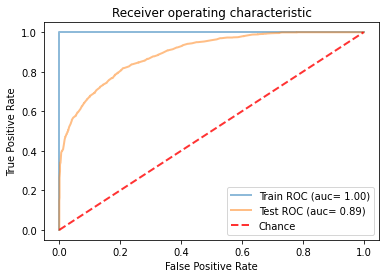

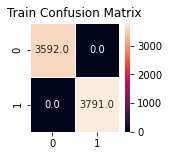

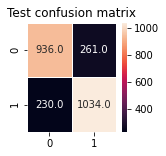

In [43]:
generate_cm_roc(bagging_model_results)

test_accuracy: 0.798049573344169
train_accuracy: 1.0
test_f1_score: 0.7903838043019822
train_f1_score: 1.0


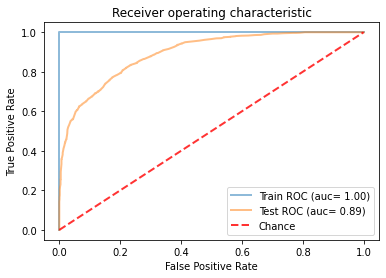

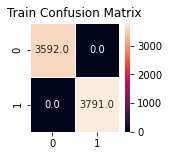

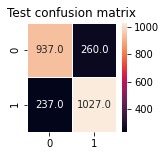

In [44]:

param_grid = {"base_estimator__max_depth" : [30,40,50],
              "max_samples" : [0.05, 0.1, 0.2,0.5,0.75,0.8,1]
             }
clf = GridSearchCV(bagging_model_results[10],param_grid,cv=5,return_train_score=True)

#tree.DecisionTreeClassifier(),n_estimators = 100, max_features = 0.8
bagging_model_results=get_result(clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',bagging_model_results[3])
print('train_accuracy:',bagging_model_results[2])
print('test_f1_score:',bagging_model_results[5])
print('train_f1_score:',bagging_model_results[4])
generate_cm_roc(bagging_model_results)

In [45]:
bagging_model_results[10].best_score_

0.7893820881336776

In [46]:
bagging_model_results[10].best_params_

{'base_estimator__max_depth': 40, 'max_samples': 0.8}

In [47]:
import pickle
# Dump the trained decision tree classifier with Pickle
bagging_classifier_pkl_filename = 'student_university_bagging_classifier_predict.pickel'
standard_scaler_filename = 'standard_scaler_bagging_model.pickel'

bagging_classifier_model_pkl = open(bagging_classifier_pkl_filename, 'wb')
pickle.dump(bagging_model_results[10], bagging_classifier_model_pkl)

bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_filename, 'wb')
pickle.dump(bagging_model_results[11], sc_bagging_classifier_scaler_pkl)

sc_bagging_classifier_scaler_pkl.close()

bagging_classifier_model_pkl = open(bagging_classifier_pkl_filename, 'rb')
bagging_classifier_model= pickle.load(bagging_classifier_model_pkl)
bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_filename, 'rb')
standard_scaler_bagging_classifier= pickle.load(sc_bagging_classifier_scaler_pkl)
sc_bagging_classifier_scaler_pkl.close()

In [48]:
predictions=bagging_classifier_model.predict(standard_scaler_bagging_classifier.transform(testing[numerical_features]))

In [49]:
accuracy_score(testing['status'],predictions)

0.798049573344169

In [50]:
bagging_classifier_model.classes_

array(['accept', 'reject'], dtype=object)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf =BaggingClassifier(KNeighborsClassifier(),n_estimators = 100, max_features = 0.8)

bagging_model_results1=get_result(knn_clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])


test_accuracy: 0.6822429906542056
train_accuracy: 0.8679398618447786
test_f1_score: 0.6623488773747841
train_f1_score: 0.8621518450445357


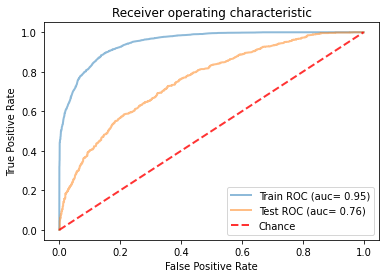

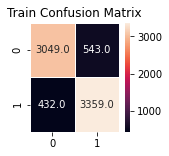

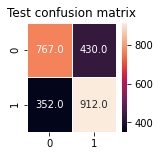

In [52]:
print('test_accuracy:',bagging_model_results1[3])
print('train_accuracy:',bagging_model_results1[2])
print('test_f1_score:',bagging_model_results1[5])
print('train_f1_score:',bagging_model_results1[4])
generate_cm_roc(bagging_model_results1)

test_accuracy: 0.7025599349857782
train_accuracy: 0.9470404984423676
test_f1_score: 0.6874466268146883
train_f1_score: 0.9453834334404245


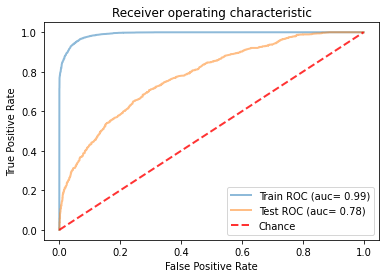

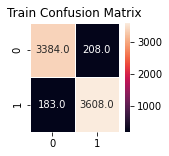

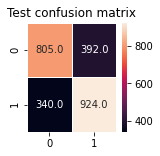

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'base_estimator__n_neighbors' : [3,5,7]}
knn_clf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(),n_estimators = 100, max_features = 0.8),param_grid,cv=5)

bagging_model_results1=get_result(knn_clf,training[numerical_features],testing[numerical_features],training['status'],testing['status'])

print('test_accuracy:',bagging_model_results1[3])
print('train_accuracy:',bagging_model_results1[2])
print('test_f1_score:',bagging_model_results1[5])
print('train_f1_score:',bagging_model_results1[4])
generate_cm_roc(bagging_model_results1)

In [54]:
bagging_model_results1[10].best_score_

0.6971418112962444

In [56]:
bagging_model_results1[10].best_params_

{'base_estimator__n_neighbors': 3}

In [57]:
bagging_classifier_kNN_pkl_filename = 'student_university_kNN_bagging_classifier_predict.pickel'
standard_scaler_kNN_filename = 'standard_scaler_kNN_bagging_model.pickel'

bagging_classifier_model_pkl = open(bagging_classifier_kNN_pkl_filename, 'wb')
pickle.dump(bagging_model_results1[10], bagging_classifier_model_pkl)

bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_kNN_filename, 'wb')
pickle.dump(bagging_model_results1[11], sc_bagging_classifier_scaler_pkl)

sc_bagging_classifier_scaler_pkl.close()

bagging_classifier_model_pkl = open(bagging_classifier_kNN_pkl_filename, 'rb')
bagging_classifier_model= pickle.load(bagging_classifier_model_pkl)
bagging_classifier_model_pkl.close()

sc_bagging_classifier_scaler_pkl = open(standard_scaler_kNN_filename, 'rb')
standard_scaler_bagging_classifier= pickle.load(sc_bagging_classifier_scaler_pkl)
sc_bagging_classifier_scaler_pkl.close()

In [58]:
predictions=bagging_classifier_model.predict(standard_scaler_bagging_classifier.transform(testing[numerical_features]))
accuracy_score(testing['status'],predictions)

0.7025599349857782

In [59]:
All_Model_results=pd.DataFrame()
All_Model_results["Model"]=model_name
All_Model_results['Train Accuracy']=model_train_acc
All_Model_results['Test Accuracy']=model_test_accuracy
All_Model_results['Train F1 score']=model_train_f1
All_Model_results['Test F1 score']=model_test_f1

In [60]:
All_Model_results

,Model,Train Accuracy,Test Accuracy,Train F1 score,Test F1 score
0,"SVC(gamma='auto', probability=True)",0.683056,0.652580,0.642748,0.607258
1,DecisionTreeClassifier(),1.000000,0.745226,1.000000,0.736886
2,"(DecisionTreeClassifier(max_features='auto', r...",0.989164,0.769606,0.988926,0.770166
3,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.998916,0.794393,0.998886,0.785956
4,GaussianNB(),0.579981,0.561560,0.611841,0.598437
5,MLPClassifier(max_iter=500),0.720574,0.652580,0.702695,0.626148
6,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.944196,0.793580,0.942905,0.786015
7,(DecisionTreeClassifier(random_state=189993664...,1.000000,0.800488,1.000000,0.792213
8,"GridSearchCV(cv=5,\n estimator=Bag...",1.000000,0.798050,1.000000,0.790384
9,"(KNeighborsClassifier(), KNeighborsClassifier(...",0.867940,0.682243,0.862152,0.662349


In [61]:
All_Model_results.to_csv('All_Model_results.csv',index=False)